<a href="https://colab.research.google.com/github/Kecheng-Chen/CS194-26/blob/master/prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from sklearn.metrics import mean_squared_error
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [ ]:
class FaceLandmarksDataset(Dataset):

    def __init__(self, root_dir, length, transform=None):
        self.root_dir = root_dir
        self.length=length
        self.transform = transform

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        if idx//6+1 in [8,12,14,15,22,30,35]:
          gender = 'f'
        else:
          gender = 'm'
        img_name = os.path.join(self.root_dir,'{:02d}-{:d}{}.jpg'.format(idx//6+1,idx%6+1,gender))
        image = io.imread(img_name)
        image = rgb2gray(image)
        image = image-0.5
        image = transform.resize(image, (54,70),anti_aliasing=True)
        image = torch.from_numpy(image)
        file = open(self.root_dir + '{:02d}-{:d}{}.asf'.format(idx//6+1,idx%6+1,gender))
        points = file.readlines()[16:74]
        landmarks = []
        for point in points:
          x,y = point.split('\t')[2:4]
          landmarks.append([float(x), float(y)])
        sample = {'image': image, 'landmarks': torch.from_numpy(np.array(landmarks).astype('float32')[-6])}

        if self.transform:
            sample = self.transform(sample)

        return sample

def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(image.shape[1]*landmarks[0], image.shape[0]*landmarks[1], marker='.', c='r')
    plt.pause(0.001)

In [ ]:
face_dataset = FaceLandmarksDataset(root_dir='/content/drive/My Drive/imm_face_db/',length=240)

239 torch.Size([54, 70]) torch.Size([2])


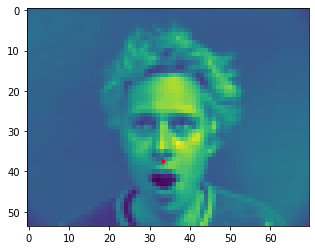

In [ ]:
fig = plt.figure()
i=239
sample = face_dataset[i]
print(i, sample['image'].shape, sample['landmarks'].shape)
show_landmarks(**sample)

In [ ]:
dataloader = DataLoader(face_dataset, batch_size=1, shuffle=False, num_workers=1)

0 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.4907, 0.6314]])


<Figure size 432x288 with 0 Axes>

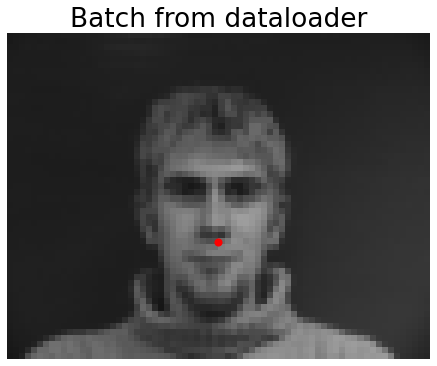

1 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.4877, 0.6475]])


<Figure size 432x288 with 0 Axes>

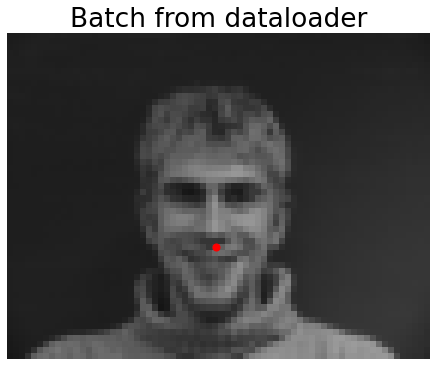

2 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.4554, 0.6018]])


<Figure size 432x288 with 0 Axes>

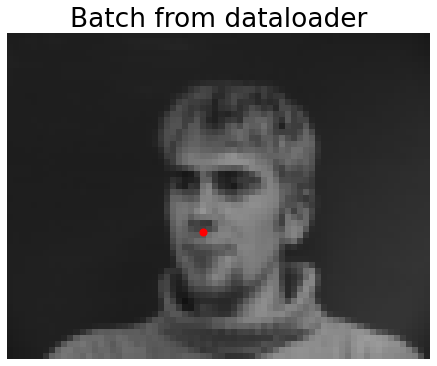

3 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.6429, 0.6058]])


<Figure size 432x288 with 0 Axes>

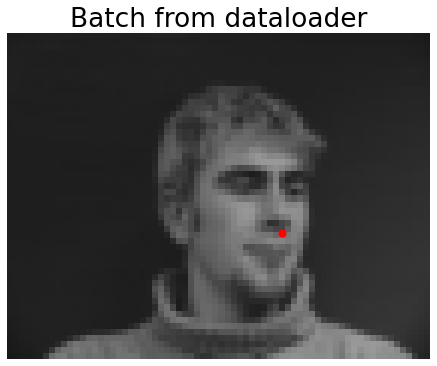

4 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5109, 0.5911]])


<Figure size 432x288 with 0 Axes>

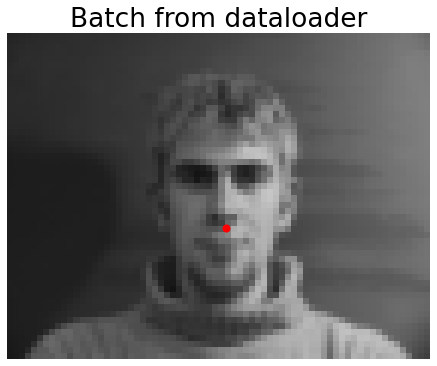

5 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.4010, 0.6005]])


<Figure size 432x288 with 0 Axes>

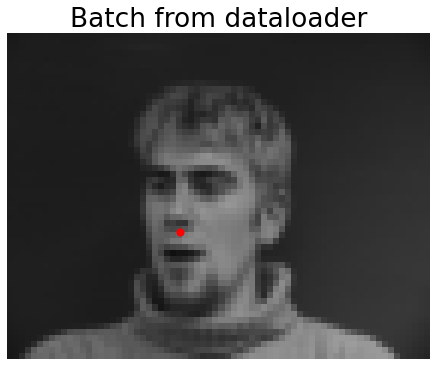

6 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5371, 0.6677]])


<Figure size 432x288 with 0 Axes>

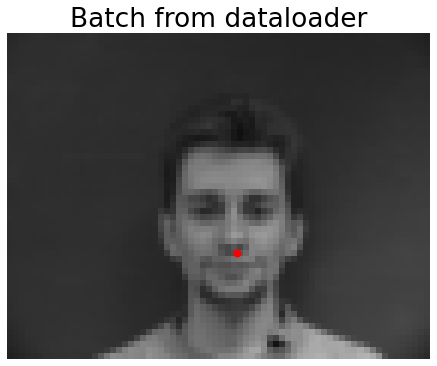

7 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5532, 0.7066]])


<Figure size 432x288 with 0 Axes>

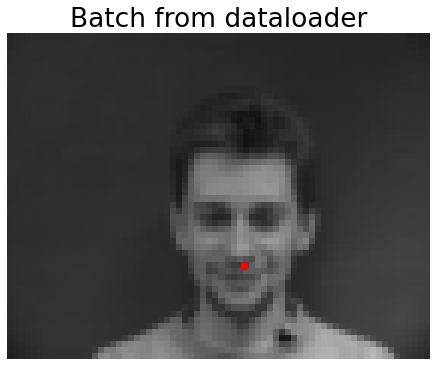

8 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.4312, 0.6797]])


<Figure size 432x288 with 0 Axes>

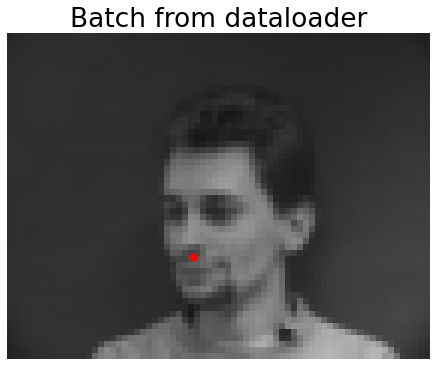

9 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.6298, 0.7053]])


<Figure size 432x288 with 0 Axes>

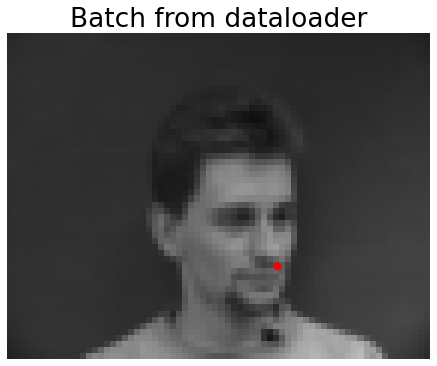

10 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5401, 0.6797]])


<Figure size 432x288 with 0 Axes>

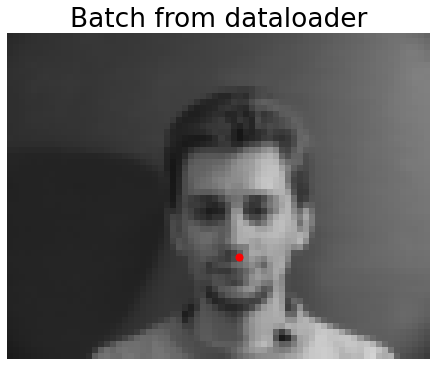

11 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5280, 0.6529]])


<Figure size 432x288 with 0 Axes>

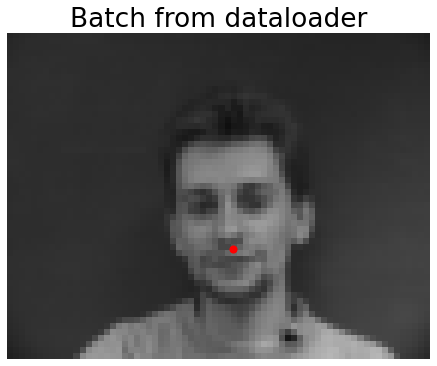

12 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5713, 0.6179]])


<Figure size 432x288 with 0 Axes>

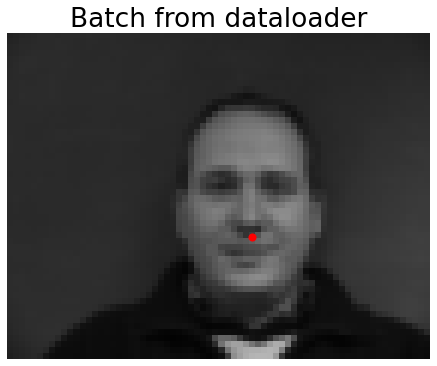

13 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5764, 0.6300]])


<Figure size 432x288 with 0 Axes>

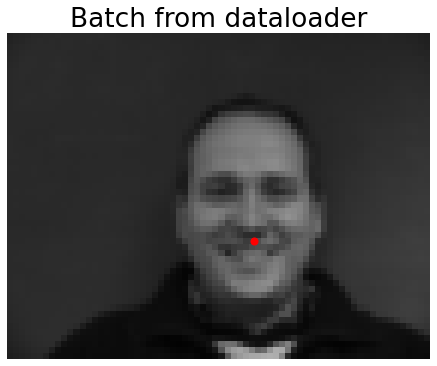

14 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5179, 0.6139]])


<Figure size 432x288 with 0 Axes>

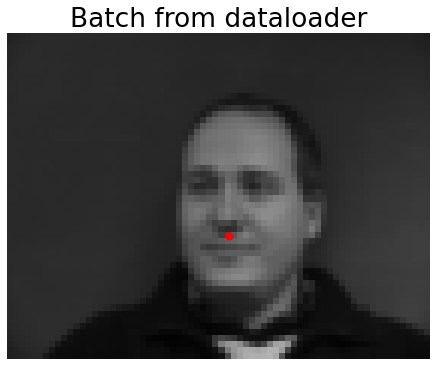

15 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.6459, 0.5897]])


<Figure size 432x288 with 0 Axes>

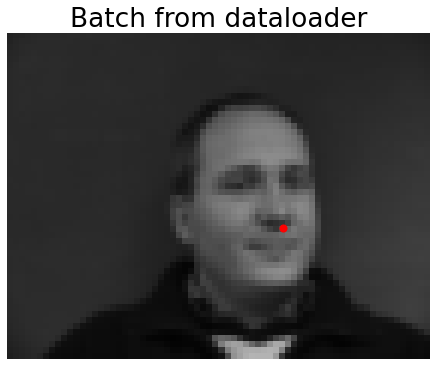

16 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5824, 0.6085]])


<Figure size 432x288 with 0 Axes>

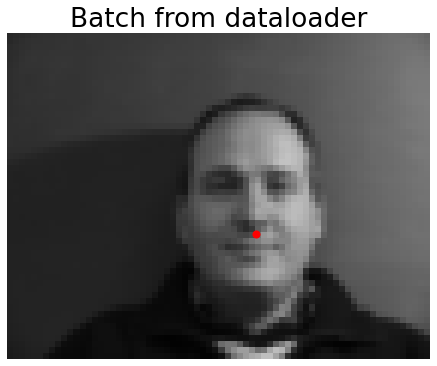

17 torch.Size([1, 54, 70]) torch.Size([1, 2])
tensor([[0.5845, 0.6153]])


<Figure size 432x288 with 0 Axes>

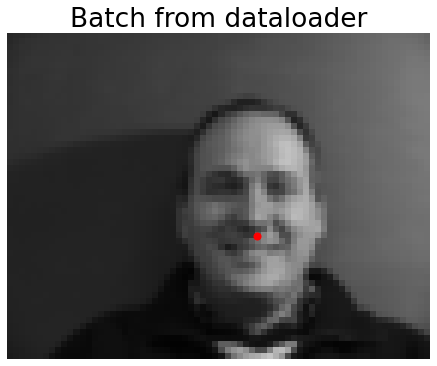

In [ ]:
def show_landmarks_batch(sample_batched):
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2
    grid = utils.make_grid(images_batch.unsqueeze(1))
    fig = plt.figure(figsize=(8,6))
    plt.imshow(grid.numpy().transpose((1, 2, 0))+0.5)
    print(landmarks_batch)
    plt.scatter(landmarks_batch[0,0].numpy()*70,
                    landmarks_batch[0,1].numpy()*54,
                    s=200, marker='.', c='r')
    plt.title('Batch from dataloader')
    #for i in range(batch_size):
        #plt.scatter(landmarks_batch[i,0].numpy()*70 + i * im_size + (i + 1) * grid_border_size,
                    #landmarks_batch[i,1].numpy()*54 + grid_border_size,
                    #s=10, marker='.', c='r')

        #plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch <18:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        if i_batch == 17:
          break

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, 7)
        self.conv2 = nn.Conv2d(12, 24, 5)
        self.conv3 = nn.Conv2d(24, 32, 3)
        self.fc1 = nn.Linear(32*6*4, 20)
        self.fc2 = nn.Linear(20, 2)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net().float()
print(net)

Net(
  (conv1): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=768, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
final=np.zeros((25,2))
for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    valid_loss = 0.0
    for i, data in enumerate(dataloader):
      if i<192:
        inputs, labels = \
            data['image'], data['landmarks']
        # zero the parameter gradients
        optimizer.zero_grad()
        
        outputs = net(inputs.unsqueeze(1).float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
      else:
        inputs, labels = \
            data['image'], data['landmarks']
        outputs = net(inputs.unsqueeze(1).float())
        loss = criterion(outputs, labels)
        valid_loss += loss.item()
    final[epoch,0]=running_loss/192
    final[epoch,1]=valid_loss/48
print('Finished Training')

Finished Training


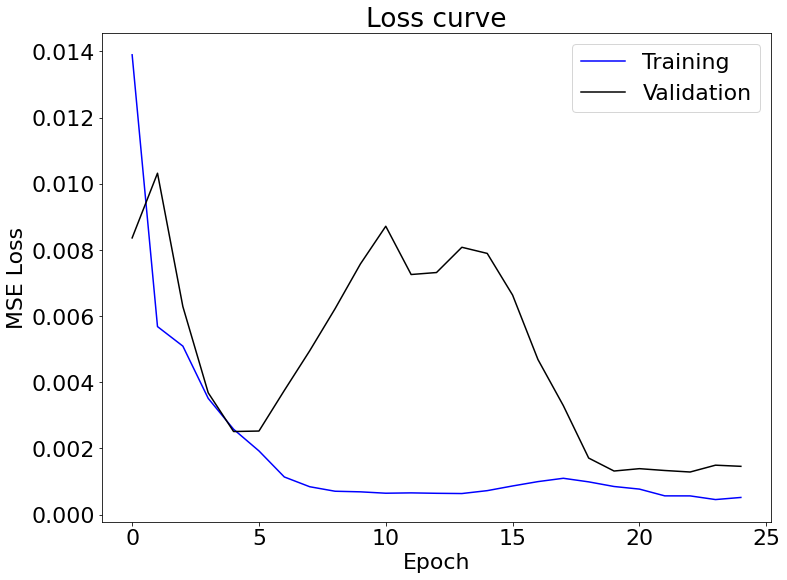

In [ ]:
t1 = np.arange(0.0, 25.0, 1.0)
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,9))
plt.plot(t1, final[:,0], 'b', t1, final[:,1], 'k')
plt.legend(['Training', 'Validation'])
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.title('Loss curve')
plt.show()

In [ ]:
PATH = '/content/drive/My Drive/prob1_25epoch.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

209 torch.Size([54, 70]) torch.Size([2])


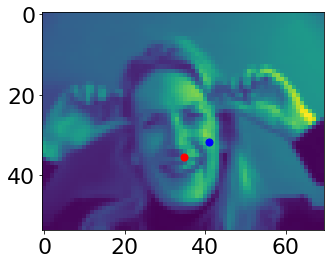

In [ ]:
fig = plt.figure()
i=209
sample = face_dataset[i]
print(i, sample['image'].shape, sample['landmarks'].shape)
image=sample['image']
landmarks=sample['landmarks']
outputs = net(image.unsqueeze(0).unsqueeze(0).float())
plt.imshow(image)
plt.scatter(image.shape[1]*landmarks[0], image.shape[0]*landmarks[1], s=200, marker='.', c='r')
plt.scatter(image.shape[1]*outputs.detach().numpy()[0,0], image.shape[0]*outputs.detach().numpy()[0,1], s=200, marker='.', c='b')
plt.pause(0.001)